# IMPORT DATASET

In [47]:
import pandas as pd

In [48]:
A=pd.read_csv('E:/Dataset/Mall_Customers.csv')

# DATA PROFILING

In [49]:
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [51]:
A.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
A.shape

(200, 5)

# DATA PRE-PROCESSING

In [53]:
A.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [59]:
import matplotlib.pyplot as plt
import seaborn as sb

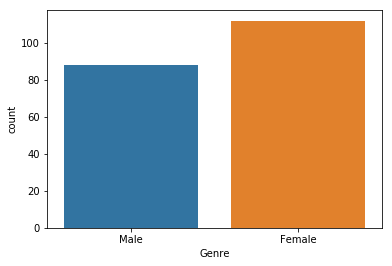

In [60]:
sb.countplot(A.Genre)#Distribution of Gender in a mall
plt.show()

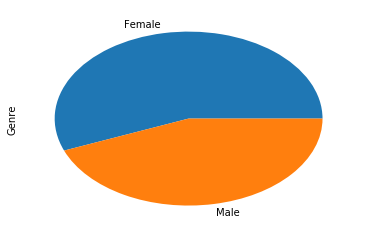

In [61]:
A['Genre'].value_counts().plot(kind="pie")#Females have more contribution than man

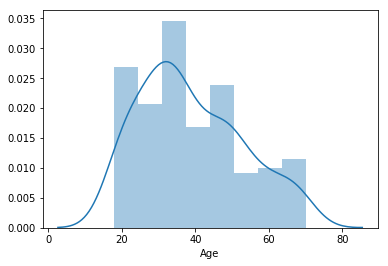

In [62]:
sb.distplot(A['Age'])#Ages from 20 to 40 are more frequent in a mall

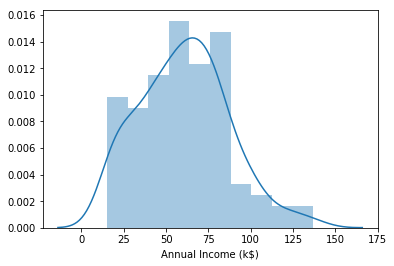

In [63]:
sb.distplot(A['Annual Income (k$)'])

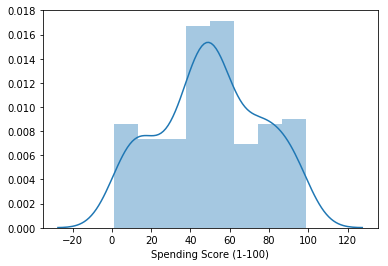

In [64]:
sb.distplot(A['Spending Score (1-100)'])

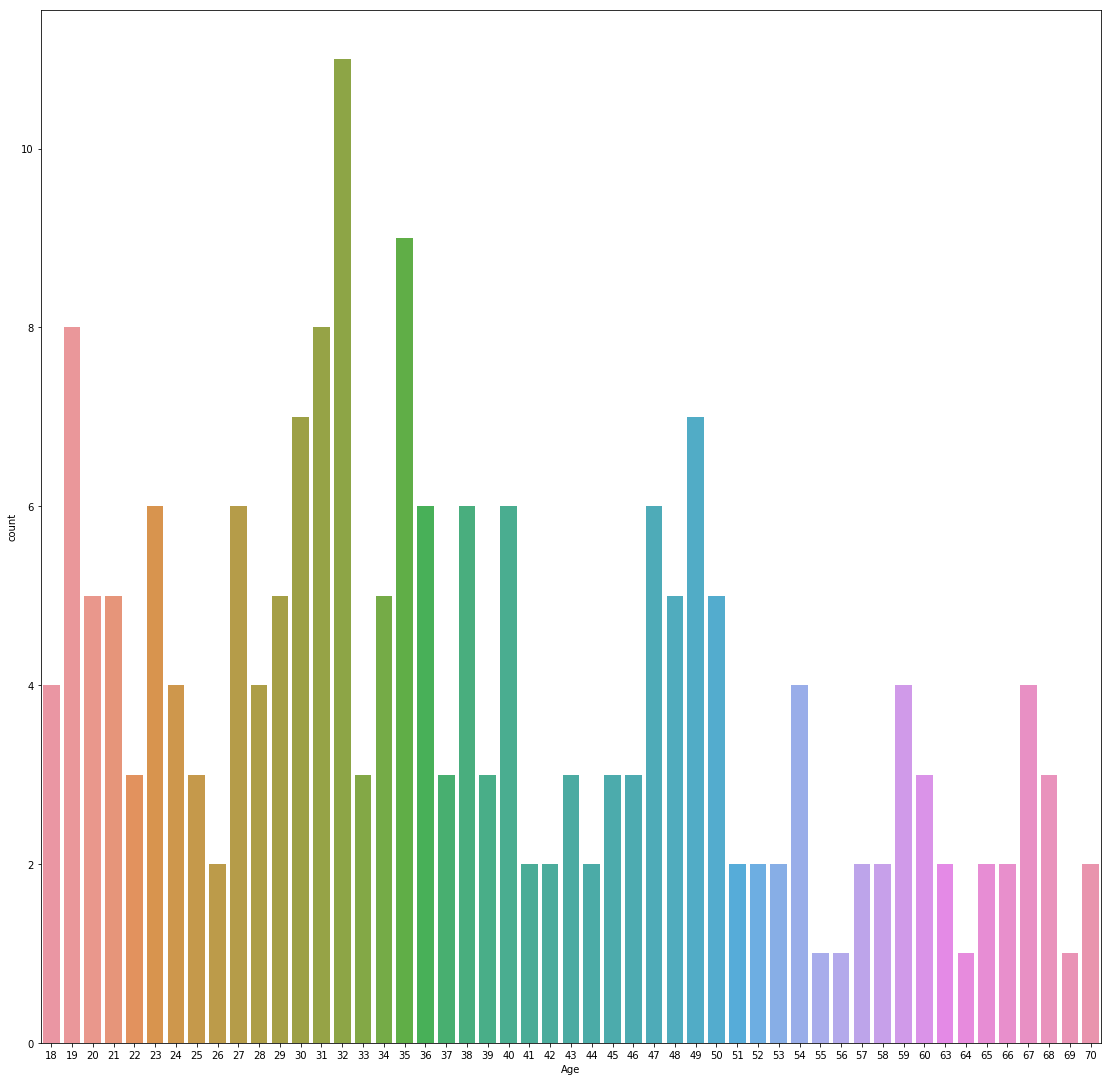

In [65]:
plt.figure(figsize=(19,19))
sb.countplot(A['Age'])#Distribution of ages in mall

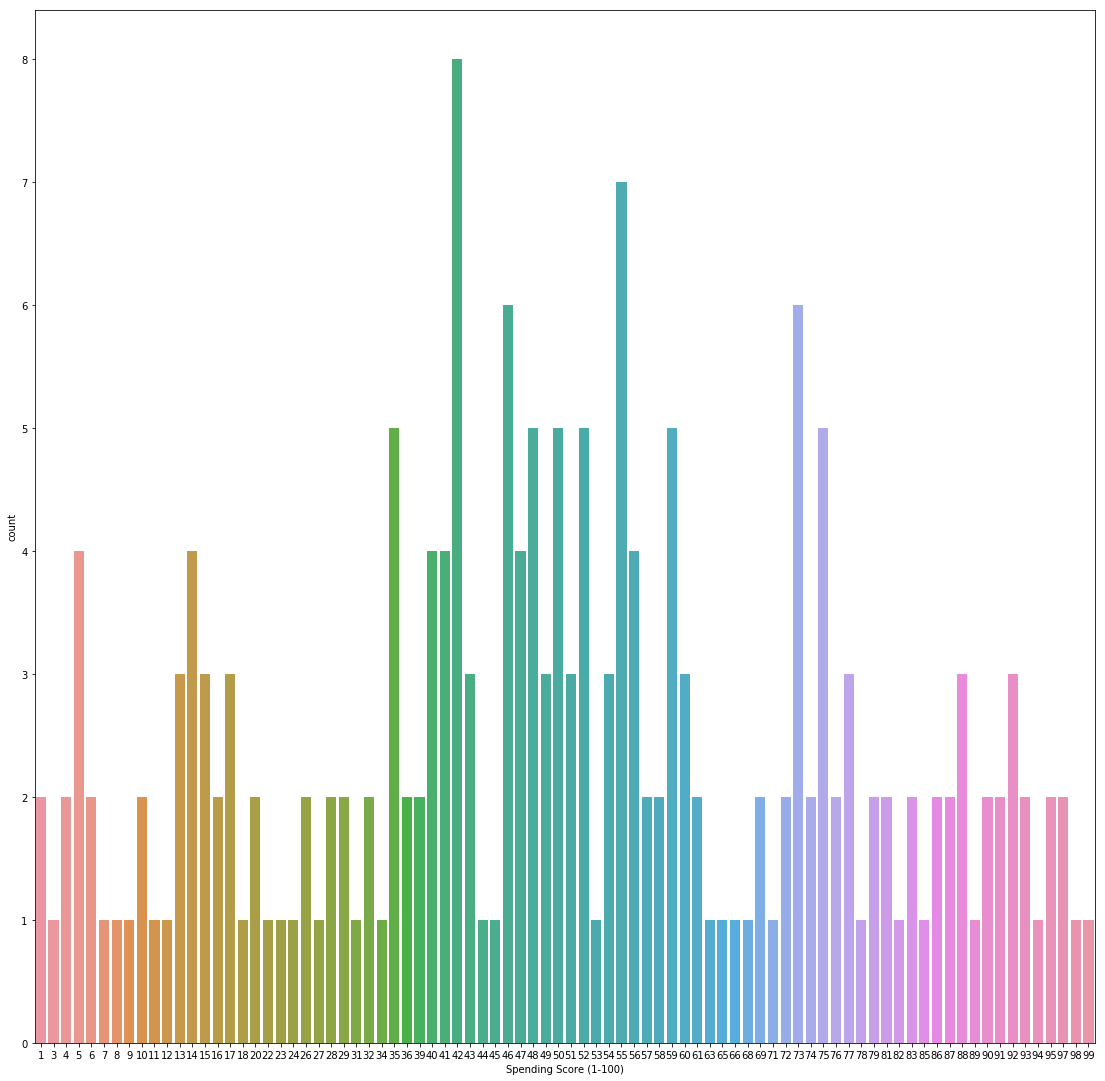

In [66]:
plt.figure(figsize=(19,19))
sb.countplot(A['Spending Score (1-100)'])#Distribution of Spending Score

In [72]:
# K-Means Clustering based on Annual Income (k$)

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [74]:
K = [1,2,3,4,5,6,7,8,9,10,11,12]
WCSS = []
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(A[['Annual Income (k$)','Spending Score (1-100)']])
    WCSS.append(model.inertia_)

Text(0.5,1,'Elbow curve')

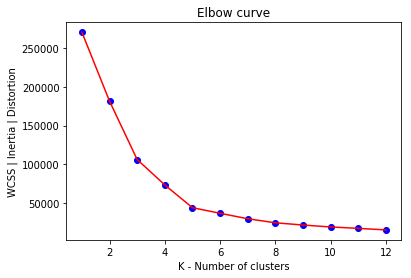

In [75]:
plt.scatter(K,WCSS,c="blue")
plt.plot(K,WCSS,c="red")
plt.xlabel("K - Number of clusters")

plt.ylabel("WCSS | Inertia | Distortion")
plt.title("Elbow curve")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


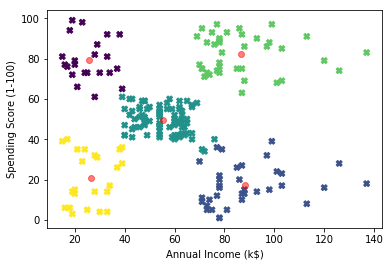

In [76]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(A[["Annual Income (k$)","Spending Score (1-100)"]])
B = A[["Annual Income (k$)","Spending Score (1-100)"]]
B['cluster'] = model.labels_
D = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])
plt.scatter(B['Annual Income (k$)'],B['Spending Score (1-100)'],c=B.cluster,marker="X")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.scatter(D.X,D.Y,c="red",marker="o",alpha=0.5)

Based on customer Annual Income and Spending Score which are the best attributes to determine the segments of a customer in a Mall

In [78]:
# K-Means Clustering based on Age (k$)

In [77]:
K = [1,2,3,4,5,6,7,8,9,10,11,12]
WCSS = []
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(A[['Age','Spending Score (1-100)']])
    WCSS.append(model.inertia_)

Text(0.5,1,'Elbow curve')

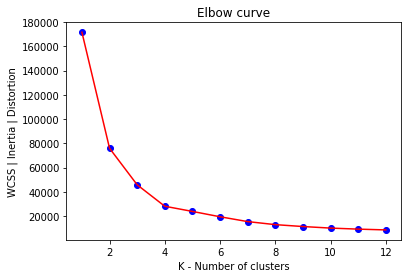

In [13]:
plt.scatter(K,WCSS,c="blue")
plt.plot(K,WCSS,c="red")
plt.xlabel("K - Number of clusters")

plt.ylabel("WCSS | Inertia | Distortion")
plt.title("Elbow curve")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


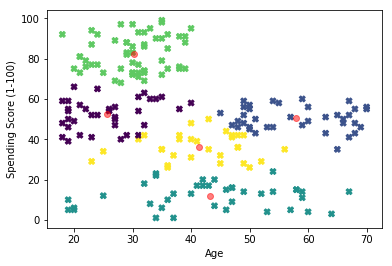

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(A[["Age","Spending Score (1-100)"]])
B = A[["Age","Spending Score (1-100)"]]
B['cluster'] = model.labels_
D = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])
plt.scatter(B['Age'],B['Spending Score (1-100)'],c=B.cluster,marker="X")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.scatter(D.X,D.Y,c="red",marker="o",alpha=0.5)

4 different categories are decided Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

# Hierarchical Clustering according to Annual Income

In [15]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = A[["Annual Income (k$)","Spending Score (1-100)"]]
B = pd.DataFrame(ss.fit_transform(B),columns=["Annual Income (k$)","Spending Score (1-100)"])

In [16]:
agc = AgglomerativeClustering(n_clusters=5)
model = agc.fit(B)

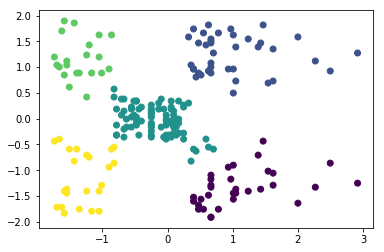

In [17]:
plt.scatter(B['Annual Income (k$)'],B['Spending Score (1-100)'],c=model.labels_)

Based on customer Annual Income and Spending Score which are the best attributes to determine the segments of a customer in a Mall

In [18]:
A['label_for_grouping']=model.labels_

In [19]:
A

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label_for_grouping
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


# Hierarchical Clustering according to Age

In [20]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = A[["Age","Spending Score (1-100)"]]
B = pd.DataFrame(ss.fit_transform(B),columns=["Age","Spending Score (1-100)"])

In [21]:
agc = AgglomerativeClustering(n_clusters=5)
model = agc.fit(B)

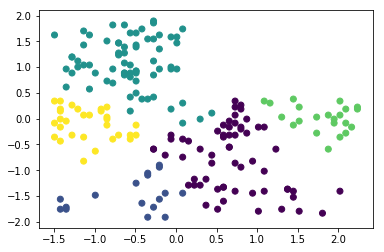

In [22]:
plt.scatter(B['Age'],B['Spending Score (1-100)'],c=model.labels_)

4 different categories are decided Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall